# Theoretical Q&A

##1. What is a Decision Tree, and how does it work?
A Decision Tree is a supervised machine learning algorithm used for both classification and regression tasks. It models decisions and their possible consequences in a tree-like structure.

Working:

Start at the root node.

Select the feature that best splits the data based on an impurity measure.

Split the dataset based on the selected feature's values.

Repeat this process recursively for each branch.

Stop when a stopping criterion is met (e.g., max depth, minimum samples, pure nodes).
___

##2. What are impurity measures in Decision Trees?
Impurity measures quantify how mixed the class labels are in a node. They help to select the best feature for splitting.

Common impurity measures:

Gini Impurity

Entropy (used with Information Gain)

Mean Squared Error (for regression)
___

##3. What is the mathematical formula for Gini Impurity?

$$
Gini = 1 - \sum_{i=1}^{C} p_i^2
$$
___

##4. What is the mathematical formula for Entropy?

$$
Entropy = - Σ p_i * log₂(p_i)
$$

___

##5. What is Information Gain, and how is it used in Decision Trees?
Information Gain (IG) is a metric that quantifies the reduction in impurity (uncertainty) achieved by splitting the dataset based on a particular feature.

It is calculated as the difference between the impurity of the parent node and the weighted sum of the impurity of the child nodes.

A higher Information Gain means a more effective feature for splitting the data.

Use in Decision Trees:

At each node, the tree evaluates all features and chooses the one with the highest Information Gain to split the data.

This process continues recursively to build the tree.
___

##6. What is the difference between Gini Impurity and Entropy?
| Feature              | Gini Impurity                                       | Entropy                                                |
| -------------------- | --------------------------------------------------- | ------------------------------------------------------ |
| Definition           | Measures the probability of misclassifying a sample | Measures the information content or randomness in data |
| Formula              | $G = 1 - \sum p_i^2$                                | $H = - \sum p_i \log_2(p_i)$                           |
| Range (binary)       | 0 to 0.5                                            | 0 to 1                                                 |
| Splitting Preference | Tends to favor larger partitions (fast gain)        | Tends to create more balanced splits                   |
| Computation          | Faster (no log terms)                               | Slower (involves logarithms)                           |

___

##7. What is the mathematical explanation behind Decision Trees?
A Decision Tree builds a hypothesis function h(x) using recursive binary (or multi-way) splits of the input space. It follows:

Choose the best feature
A to split the dataset using an impurity measure.
Divide the dataset
All instances in a node belong to the same class (pure node).
A maximum tree depth is reached.
A minimum number of samples in node is met.
___

##8. What is Pre-Pruning in Decision Trees?
Pre-Pruning (early stopping) involves stopping the tree construction process early to avoid overfitting.

Common pre-pruning techniques:

Limit maximum depth of tree.

Minimum number of samples required to split.

Minimum information gain for a split.
___

##9. What is Post-Pruning in Decision Trees?
Post-Pruning is applied after the full tree is grown. It simplifies the tree by removing branches that have little importance.

Steps:

Build a full tree.

Evaluate subtrees using a validation set.

Remove (prune) subtrees that do not improve performance.
___

##10. What is the difference between Pre-Pruning and Post-Pruning?
Feature	Pre-Pruning	Post-Pruning
When Applied	During tree construction	After full tree is grown
Goal	Prevent overfitting early	Reduce overfitting after training
Risk	May stop growth too early (underfitting)	More computational cost
___

##11. What is a Decision Tree Regressor?
A Decision Tree Regressor is a variant of the decision tree algorithm used for predicting continuous (real-valued) outputs, instead of class labels.

Key Concepts:

Instead of classification impurity measures, it uses variance reduction (commonly Mean Squared Error, or MSE) to determine the best splits.

The prediction at each leaf node is the mean of the target values in that node.

Use Cases: Price prediction, stock forecasting, demand estimation, etc.

___

##12. What are the advantages and disadvantages of Decision Trees?
Advantages:

Easy to interpret and visualize.

Handles both numerical and categorical data.

Requires little data preprocessing.

Can handle missing values.

Disadvantages:

Prone to overfitting.

Unstable to small variations in data.

Greedy nature may not yield the optimal tree.
___

##13. How does a Decision Tree handle missing values?
Decision Trees handle missing values using:

Surrogate splits: Use alternative features to split when the primary feature is missing.

Ignoring missing values: Exclude samples with missing values during split calculation.

Some implementations (e.g., XGBoost, sklearn) automatically handle missing data in splits.
___

##14. How does a Decision Tree handle categorical features?
Categorical features can be split by creating branches for each category.

Some implementations one-hot encode categorical variables.

Modern libraries (like LightGBM or CatBoost) handle categorical variables natively.
___

##15. What are some real-world applications of Decision Trees?
Medical Diagnosis: Predict disease based on symptoms.

Customer Churn Prediction: Identify customers likely to leave.

Credit Scoring: Assess risk of loan applicants.

Fraud Detection: Identify abnormal transaction patterns.

Recommendation Systems: Suggest products based on user behavior.
___

# Practical Q&A

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay,
    mean_squared_error, classification_report
)

In [2]:
from google.colab import files
uploaded = files.upload()

Saving iris.csv to iris.csv


In [3]:
for filename in uploaded.keys():
    iris_df = pd.read_csv(filename)
    print(f"{filename} loaded successfully.")
    display(iris_df.head())

iris.csv loaded successfully.


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
X = iris_df.drop(columns=["species"])
y = iris_df["species"]

# Encode class labels to integers 0/1/2
le = LabelEncoder()
y_enc = le.fit_transform(y)

# Train–test split (stratified for balanced classes)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_enc, test_size=0.2, stratify=y_enc, random_state=42
)

print(f"Train size: {X_train.shape}, Test size: {X_test.shape}")

Train size: (120, 4), Test size: (30, 4)


1 — Decision Tree Classifier on Iris (default = Gini)

In [5]:
dt_default = DecisionTreeClassifier(random_state=42)
dt_default.fit(X_train, y_train)
acc_default = accuracy_score(y_test, dt_default.predict(X_test))
print("Decision-Tree Classifier Accuracy:", round(acc_default, 4))


Decision-Tree Classifier Accuracy: 0.9333


2 — Decision Tree Classifier with Gini & feature importances

In [6]:
dt_gini = DecisionTreeClassifier(criterion="gini", random_state=42)
dt_gini.fit(X_train, y_train)

importances = pd.Series(dt_gini.feature_importances_, index=X.columns)
print("Feature importances (Gini):\n", importances.sort_values(ascending=False))


Feature importances (Gini):
 petal_length    0.558568
petal_width     0.406015
sepal_width     0.029167
sepal_length    0.006250
dtype: float64


3 — Decision Tree Classifier with Entropy criterion (accuracy)

In [7]:
dt_entropy = DecisionTreeClassifier(criterion="entropy", random_state=42)
dt_entropy.fit(X_train, y_train)
acc_entropy = accuracy_score(y_test, dt_entropy.predict(X_test))
print("Entropy-based Tree Accuracy:", round(acc_entropy, 4))


Entropy-based Tree Accuracy: 0.9333


4 — Decision Tree Regressor on a housing dataset (MSE)

In [8]:
# Use built-in California Housing (sklearn ≥1.2)
from sklearn.datasets import fetch_california_housing
X_house, y_house = fetch_california_housing(return_X_y=True, as_frame=True)

Xh_tr, Xh_te, yh_tr, yh_te = train_test_split(
    X_house, y_house, test_size=0.2, random_state=42
)

dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(Xh_tr, yh_tr)
mse = mean_squared_error(yh_te, dtr.predict(Xh_te))
print("Decision-Tree Regressor MSE:", round(mse, 4))


Decision-Tree Regressor MSE: 0.4952


5 — Visualise the tree with graphviz

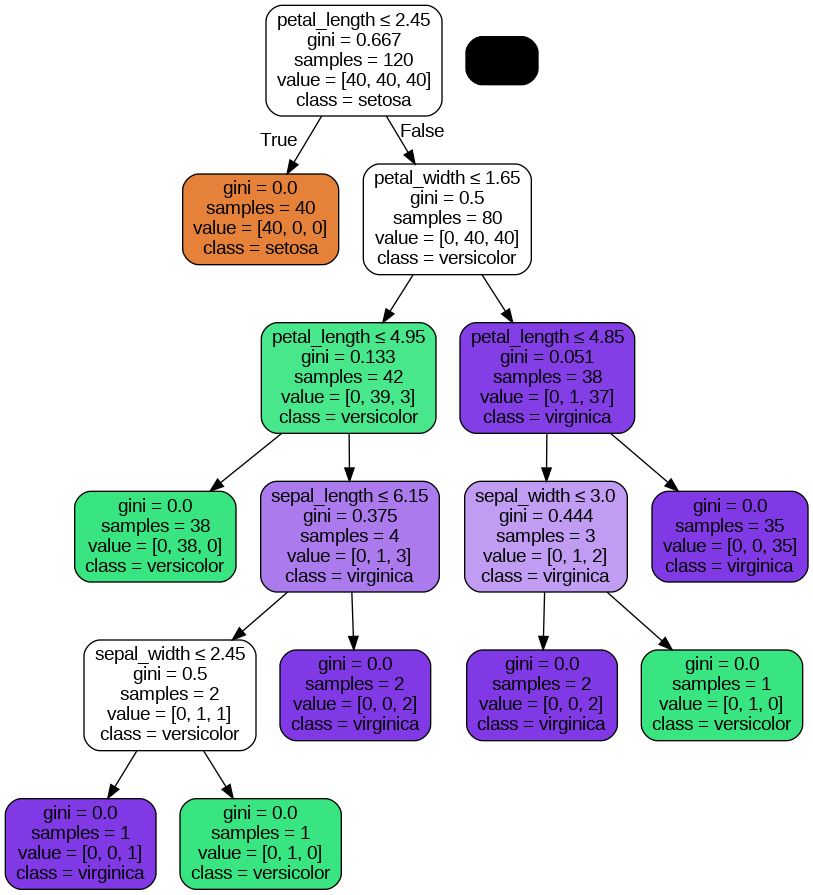

In [9]:
# Requires graphviz & pydotplus installed + Graphviz system binaries
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

dot_data = export_graphviz(
    dt_default, out_file=None,
    feature_names=X.columns,
    class_names=le.classes_,
    filled=True, rounded=True, special_characters=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())


6 — Depth-limited (max_depth = 3) vs fully grown tree

In [10]:
shallow = DecisionTreeClassifier(max_depth=3, random_state=42)
shallow.fit(X_train, y_train)

acc_shallow = accuracy_score(y_test, shallow.predict(X_test))
print(f"max_depth=None  → accuracy = {round(acc_default,4)}")
print(f"max_depth=3     → accuracy = {round(acc_shallow,4)}")


max_depth=None  → accuracy = 0.9333
max_depth=3     → accuracy = 0.9667


7 — min_samples_split = 5 vs default

In [11]:
split5 = DecisionTreeClassifier(min_samples_split=5, random_state=42)
split5.fit(X_train, y_train)

acc_split5 = accuracy_score(y_test, split5.predict(X_test))
print(f"default min_samples_split (2) → {round(acc_default,4)}")
print(f"min_samples_split=5           → {round(acc_split5,4)}")


default min_samples_split (2) → 0.9333
min_samples_split=5           → 0.9667


8 — Feature-scaled data vs unscaled

In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

dt_scaled = DecisionTreeClassifier(random_state=42)
dt_scaled.fit(X_train_scaled, y_train)

acc_scaled = accuracy_score(y_test, dt_scaled.predict(X_test_scaled))
print(f"Unscaled accuracy : {round(acc_default,4)}")
print(f"Scaled accuracy   : {round(acc_scaled ,4)}")


Unscaled accuracy : 0.9333
Scaled accuracy   : 0.9


9 — Decision Tree with One-vs-Rest (OvR) wrapper

In [13]:
from sklearn.multiclass import OneVsRestClassifier

ovr_tree = OneVsRestClassifier(DecisionTreeClassifier(random_state=42))
ovr_tree.fit(X_train, y_train)
acc_ovr = accuracy_score(y_test, ovr_tree.predict(X_test))
print("One-vs-Rest Tree Accuracy:", round(acc_ovr, 4))


One-vs-Rest Tree Accuracy: 0.9667


10 — Display feature-importance scores (again, any tree)

In [14]:
print("Feature importances (default tree):")
for name, val in zip(X.columns, dt_default.feature_importances_):
    print(f"{name:17s}: {val:.3f}")


Feature importances (default tree):
sepal_length     : 0.006
sepal_width      : 0.029
petal_length     : 0.559
petal_width      : 0.406


11 — Decision-Tree Regressor with max_depth=5 vs unrestricted

In [15]:
dtr5 = DecisionTreeRegressor(max_depth=5, random_state=42).fit(Xh_tr, yh_tr)
mse_full  = mean_squared_error(yh_te, dtr.predict(Xh_te))
mse_depth = mean_squared_error(yh_te, dtr5.predict(Xh_te))

print(f"Depth-unrestricted MSE : {round(mse_full ,4)}")
print(f"max_depth=5      MSE   : {round(mse_depth,4)}")


Depth-unrestricted MSE : 0.4952
max_depth=5      MSE   : 0.5245


12 — Cost-Complexity Pruning (CCP) curve

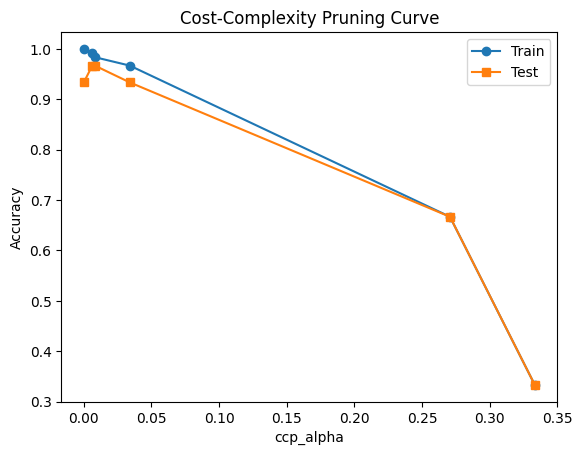

In [16]:
path = dt_default.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
train_acc, test_acc = [], []

for alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
    clf.fit(X_train, y_train)
    train_acc.append(accuracy_score(y_train, clf.predict(X_train)))
    test_acc.append(accuracy_score(y_test , clf.predict(X_test )))

import matplotlib.pyplot as plt
plt.figure()
plt.plot(ccp_alphas, train_acc, marker="o", label="Train")
plt.plot(ccp_alphas, test_acc , marker="s", label="Test")
plt.xlabel("ccp_alpha"); plt.ylabel("Accuracy"); plt.legend()
plt.title("Cost-Complexity Pruning Curve")
plt.show()


13 — Evaluate Precision, Recall, F1-Score

In [17]:
print(classification_report(y_test, dt_default.predict(X_test),
                            target_names=le.classes_))


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



14 — Visualise confusion matrix with seaborn


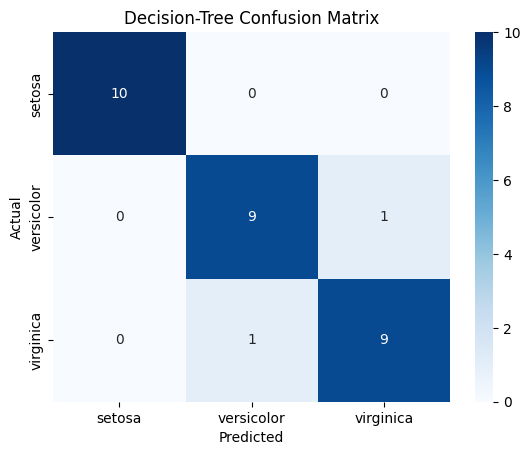

In [18]:
import seaborn as sns
cm = confusion_matrix(y_test, dt_default.predict(X_test))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted"); plt.ylabel("Actual")
plt.title("Decision-Tree Confusion Matrix")
plt.show()


15 — GridSearchCV for optimal max_depth & min_samples_split

In [19]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "max_depth": [None, 2, 3, 4, 5, 6],
    "min_samples_split": [2, 3, 4, 5, 10]
}

grid = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)
grid.fit(X_train, y_train)

print("Best params :", grid.best_params_)
print("Best CV acc :", round(grid.best_score_, 4))
print("Test acc    :", round(accuracy_score(y_test, grid.best_estimator_.predict(X_test)), 4))


Best params : {'max_depth': None, 'min_samples_split': 2}
Best CV acc : 0.9417
Test acc    : 0.9333
